In [1]:
import sys
import os
os.chdir("/home/debian/PhenPred")

import PhenPred
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PhenPred.vae import shap_folder, plot_folder

In [2]:
time_alldat = "20240805_132345" #all datasets, no dipvae
time_alldat_dis = "20240805_131847" #all datasets w/ disentanglement, lambda_d = 0.001, lambda_od = 0.001

target_latent = "latent"
target_drug = "drugresponse"

RAM (GB) snapshots

In [6]:
with open(f"{shap_folder}/files/{time_alldat}_snapshots_{target_latent}.json", 'r') as file:
    snap_alldat_latent = json.load(file)

with open(f"{shap_folder}/files/{time_alldat}_snapshots_{target_drug}.json", 'r') as file:
    snap_alldat_drug = json.load(file)

with open(f"{shap_folder}/files/{time_alldat_dis}_snapshots_{target_latent}.json", 'r') as file:
    snap_alldat_latent_disent = json.load(file)

with open(f"{shap_folder}/files/{time_alldat_dis}_snapshots_{target_drug}.json", 'r') as file:
    snap_alldat_drug_disent = json.load(file)

ram_alldat_latent = snap_alldat_latent[:-1]
ram_alldat_drug = snap_alldat_drug[:-1]
ram_alldat_latent_disent = snap_alldat_latent_disent[:-1]
ram_alldat_drug_disent = snap_alldat_drug_disent[:-1]


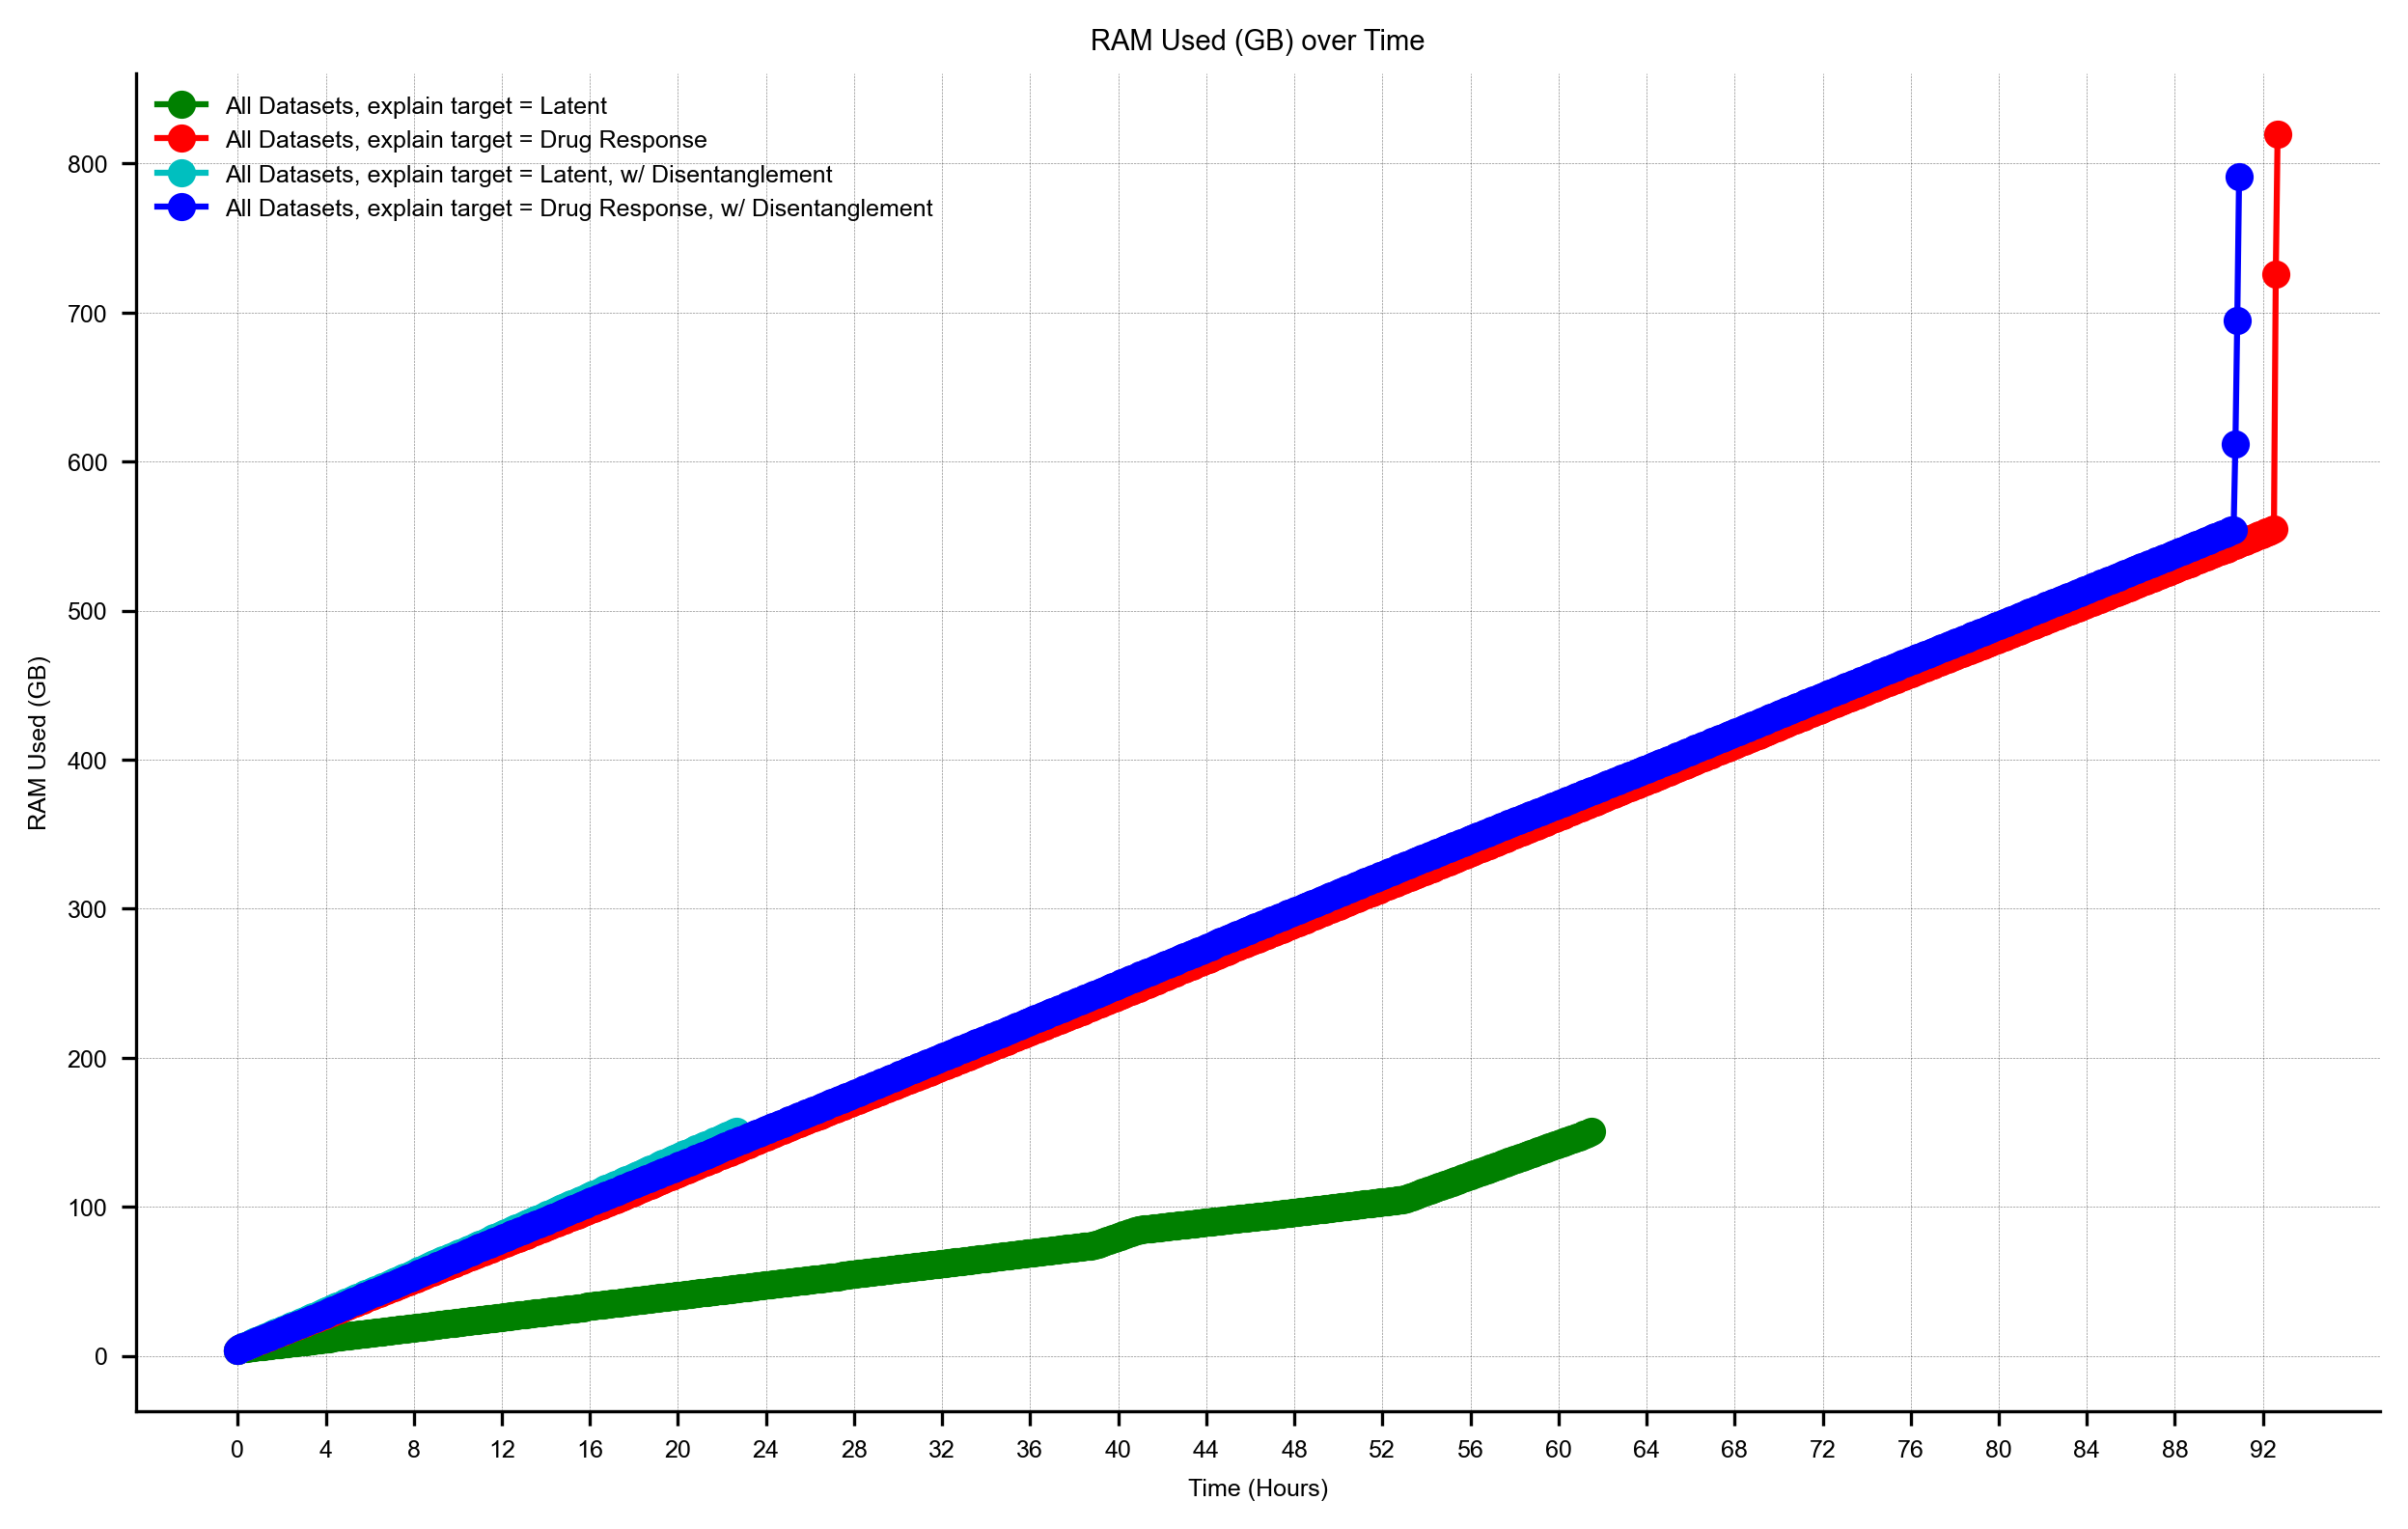

In [18]:
# Plot RAM 
plt.figure(figsize=(10, 6))

plt.plot(ram_alldat_latent, label='All Datasets, explain target = Latent', marker='o', linestyle='-', color='g')
plt.plot(ram_alldat_drug, label='All Datasets, explain target = Drug Response', marker='o', linestyle='-', color='r')
plt.plot(ram_alldat_latent_disent, label='All Datasets, explain target = Latent, w/ Disentanglement', marker='o', linestyle='-', color='c')
plt.plot(ram_alldat_drug_disent, label='All Datasets, explain target = Drug Response, w/ Disentanglement', marker='o', linestyle='-', color='b')

# Set the x-axis scale
num_points = len(ram_alldat_drug)
x_ticks = range(0, num_points, 48)  # Use an interval to place fewer ticks
x_labels = [5 * i / 60 for i in x_ticks]  # Convert minutes to hours

plt.xticks(ticks=x_ticks, labels=[f'{label:.0f}' for label in x_labels])
plt.xlabel('Time (Hours)')
plt.ylabel('RAM Used (GB)')
plt.title('RAM Used (GB) over Time')
plt.legend()
plt.grid(True)

Runtimes (s)

In [21]:
runtime_all_latent = snap_alldat_latent[-1]["Runtime (s)"]
print(
    "\nAll datasets + target_varialbe = \"latent\", Runtime: {:02d}:{:02d}:{:02d}".format(
        int(runtime_all_latent // 3600), int((runtime_all_latent % 3600) // 60), int(runtime_all_latent % 60)
    )
)

runtime_all_drug = snap_alldat_drug[-1]["Runtime (s)"]
print(
    "\nAll datasets + target_varialbe = \"drugresponse\", Runtime: {:02d}:{:02d}:{:02d}".format(
        int(runtime_all_drug // 3600), int((runtime_all_drug % 3600) // 60), int(runtime_all_drug % 60)
    )
)

runtime_all_latent_dis = snap_alldat_latent_disent[-1]["Runtime (s)"]
print(
    "\nAll datasets w/ disentanglement + target_varialbe = \"latent\", Runtime: {:02d}:{:02d}:{:02d}".format(
        int(runtime_all_latent_dis // 3600), int((runtime_all_latent_dis % 3600) // 60), int(runtime_all_latent_dis % 60)
    )
)

runtime_all_drug_dis = snap_alldat_drug_disent[-1]["Runtime (s)"]
print(
    "\nAll datasets w/ disentanglement + target_varialbe = \"latent\", Runtime: {:02d}:{:02d}:{:02d}".format(
        int(runtime_all_drug_dis // 3600), int((runtime_all_drug_dis % 3600) // 60), int(runtime_all_drug_dis % 60)
    )
)


All datasets + target_varialbe = "latent", Runtime: 61:36:18

All datasets + target_varialbe = "drugresponse", Runtime: 92:46:51

All datasets w/ disentanglement + target_varialbe = "latent", Runtime: 22:45:42

All datasets w/ disentanglement + target_varialbe = "latent", Runtime: 91:01:37
